In [1]:
import numpy as np
import pandas as pd

In [37]:
surf = pd.read_csv('superficie.csv', index_col=0, header=None)
surf = surf.rename(columns={1:'surface'})

bath = pd.read_csv('nombre_de_sdb.csv', index_col=0, header=None)
bath = bath.rename(columns={1:'bathrooms'})

room = pd.read_csv('nombre_de_chambres.csv', index_col=0, header=None)
room = room.rename(columns={1:'bedrooms'})

In [39]:
dataset = pd.concat([surf, bath, room], axis=1)
dataset.head()

,surface,bathrooms,bedrooms
0,,,
0,28844,2,1
1,27667,1,4
2,14742,1,1
3,28089,3,4
4,11713,1,2


In [42]:
# Average surface
dataset['surface'].sum() / dataset['surface'].count()

20439.77

In [43]:
dataset['bedrooms'].median()

2.0

In [44]:
dataset['bedrooms'].mean()

2.42

In [53]:
price = pd.read_csv('house_price.csv', index_col=0)
price.head()

,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


In [46]:
dataset.columns

Index(['surface', 'bathrooms', 'bedrooms'], dtype='object')

In [50]:
dataset['id'] = range(0,100)

In [54]:
dataset = pd.merge(dataset, price, on='id')

In [56]:
dataset.tail()

,surface,bathrooms,bedrooms,id,house_price
95,11417,3,3,95,132599.0
96,12126,1,2,96,155828.0
97,16390,1,2,97,237061.0
98,23738,1,2,98,976422.0
99,14613,2,2,99,183621.0


In [57]:
dataset['house_price'].sum() / dataset['house_price'].count()

767747.87

In [58]:
dataset['house_price'].sum() / dataset['bedrooms'].sum()

317251.18595041323

In [60]:
def housesize(surface):
    
    if surface > 25000:
        size = 'very big'
    elif surface > 20000:
        size = 'big'
    elif surface > 15000:
        size = 'medium'
    elif surface > 10000:
        size = 'small'
    else:
        size = 'very small'
    
    return size

In [63]:
dataset['house_size'] = dataset['surface'].apply(housesize)

In [64]:
dataset.head()

,surface,bathrooms,bedrooms,id,house_price,house_size
0,28844,2,1,0,1421908.0,very big
1,27667,1,4,1,1305091.0,very big
2,14742,1,1,2,164373.0,small
3,28089,3,4,3,1441714.0,very big
4,11713,1,2,4,108290.0,small


In [65]:
dataset.groupby('house_size').mean()

,surface,bathrooms,bedrooms,id,house_price
house_size,,,,,
big,22282.913043,1.869565,2.260870,54.826087,7.325385e+05
medium,17590.578947,1.894737,2.684211,54.000000,3.256948e+05
small,12163.961538,1.961538,2.461538,50.576923,1.561387e+05
very big,27530.812500,2.062500,2.343750,42.125000,1.552456e+06


In [66]:
import seaborn as sns

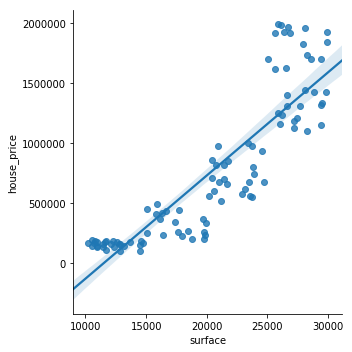

In [67]:
sns.lmplot(x='surface', y='house_price', data=dataset)